## *We will be using an extension of the MNIST letter recognition data set.*

In [ ]:
!pip install tensorflow-gpu
!pip install extra-keras-datasets

## *Github link*
https://github.com/christianversloot/extra_keras_datasets

## *Reference Paper*
https://arxiv.org/pdf/1702.05373.pdf

This paper discusses the EMNIST data set, which is a data set that extends MNIST to recognition of handwritten letters in a more challenging manner. The paper goes into detail about benchmarks of the set, as well as a validation of the set that establishes its comparability to the original MNIST set.

In [ ]:
from extra_keras_datasets import emnist
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Delete this if you don't like ggplot2 style
plt.style.use('ggplot')

In [ ]:
## Load dataset only contain lowercase and uppercase handwritten letters
# input  : X
# target : Y
(input_train, target_train), (input_test, target_test) = emnist.load_data(type='letters')

## *Let's start analysing our dataset!*

We analyzed our data set by looking at the size of the training and testing set, as well as the dimension of an image of a letter. We have provided some examples of samples in the set to give an idea of the data contained in our set, as well as the manner in which the letters are classified. 

In [ ]:
print("Number of training sample: ", target_train.shape[0])
print("Number of testing  sample: ", target_test.shape[0])

Number of training sample:  124800
Number of testing  sample:  20800


In [ ]:
# EMINST letter image has same dimension (28 x 28) as MINST
input_train[0].shape

(28, 28)

In [ ]:
# Print n to k letter in the dataset
def print_letter(n,k):
  for i in range(n,k+1):
    image = input_train[i]
    plt.imshow(image, cmap='gray')
    plt.show()
    print("The above image is: ", chr(target_train[i] + 64))

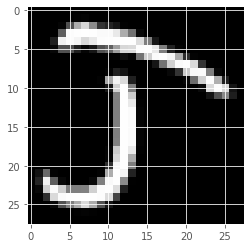

The above image is:  J


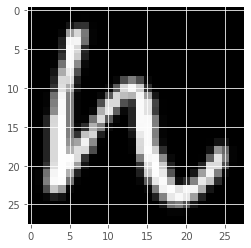

The above image is:  N


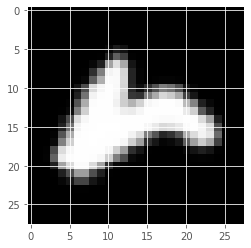

The above image is:  R


In [ ]:
# Try if we can distinguish these letter by our eyes ...
print_letter(10, 12)

It's clear that there is some ambiguity in the way the letters are written. For instance, the middle letter could be seen as a lowercase h, or a lowercase n as the classifier as specified. In addition, the last letter may not look like a letter at all, but it is in fact classified to be a lowercase letter r. These examples are shown to give a visual representation of how vague/ambiguous letters can be, and the high expectations that we have of our classifier to be able to recognize them.

## *How many different kinds of letters are there?*

We have printed a few different samples of one type of letter to further illustrate the vast differences that can exist among the samples in the set.

In [ ]:
# Print freq same letter in the dataset
def print_same_letter(letter,freq):
  count = 0
  for i in range(target_train.shape[0]):
    if chr(target_train[i]+64) == letter:
      image = input_train[i]
      plt.imshow(image, cmap='gray')
      plt.show()
      print("The above image is: ", chr(target_train[i] + 64))
      count = count + 1
      if count == freq : break

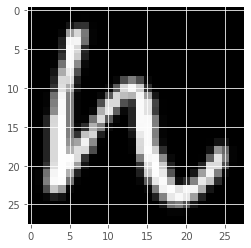

The above image is:  N


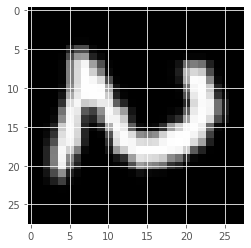

The above image is:  N


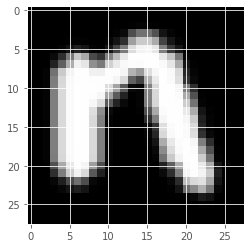

The above image is:  N


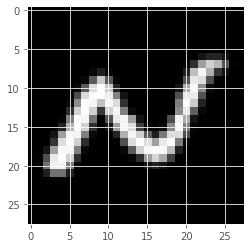

The above image is:  N


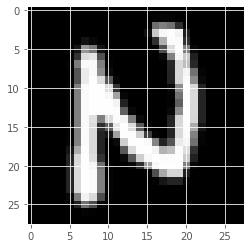

The above image is:  N


In [ ]:
# Let get five 'n', n can look like h and r
print_same_letter('N',5)

If analyzed by a human, these letters can be classified as other ones--the handwriting is such that it may resemble different letters.

## *Try with a different letter: W*

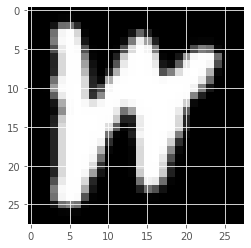

The above image is:  W


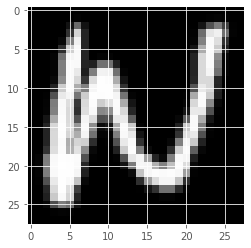

The above image is:  W


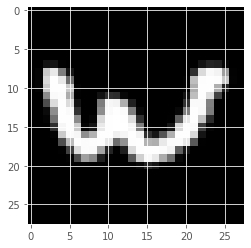

The above image is:  W


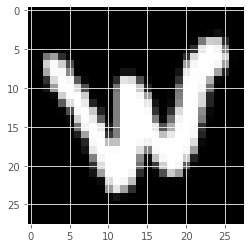

The above image is:  W


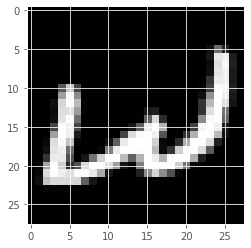

The above image is:  W


In [ ]:
# Let get five 'w'
print_same_letter('W',5)

## *What is inside the image?*
We converted an image of a letter to greyscale and printed the greyscale value at each pixel. In this way, the network is able to distinguish between different types of letters.

In [ ]:
def print_pixel_greyscale(image):
  for i in range(28):
    for u in range(28):
      print('{:4d}'.format(image[i][u]), end='')
    print("\n")

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   2   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   5  82 172 215 139  51  37  21   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   1  95 252 254 255 254 250 250 233 172 114   9   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0  32 241 252 245 217 233 252 253 254 254 254 220 127  22   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   7  81  82  32   5  21  82  97 159 215 218 253 254 232 127  34   3   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   1  15   5 115 208 251 254 245 171  46   3   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22 115 208 250 254 218  52   1   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   4  32  20   0   0   0   0   0   8  52 203 249

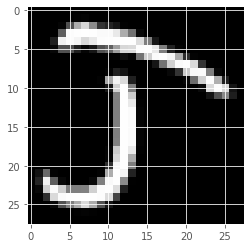

The above image is:  J


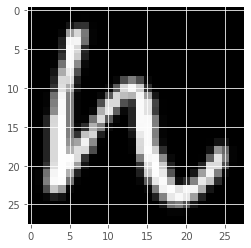

The above image is:  N


In [ ]:
# Greyscale value ranges from 0 to 255
print_pixel_greyscale(input_train[10])    

# Try to compare with the actual image
print_letter(10, 11)

Letters with high pixel dimensions will generally produce a better, more accurate result.

## *EDA procedure*

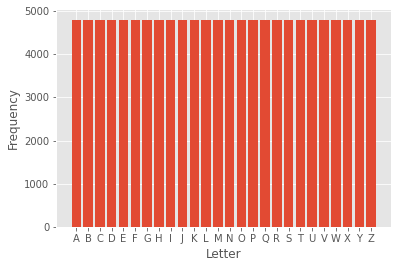

In [ ]:
# All letters in the training dataset have 4800 samples
y = pd.DataFrame(target_train).value_counts().sort_index().index
x = pd.DataFrame(target_train).value_counts().values
char_list = []
for i in y:
  char_list.append(chr(i[0]+64))

plt.bar(char_list,x,align='center') 
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.show()

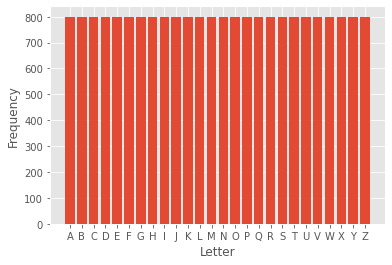

In [ ]:
# All letters in the testing dataset have 800 samples
y = pd.DataFrame(target_test).value_counts().sort_index().index
x = pd.DataFrame(target_test).value_counts().values
char_list = []
for i in y:
  char_list.append(chr(i[0]+64))

plt.bar(char_list,x,align='center') 
plt.xlabel('Letter')
plt.ylabel('Frequency')
plt.show()

## *Possibility of having outliers*

It is possible for an image dataset to consist of outliers, e.g. in a human and chimpanzee dataset there exists an image of a fish; however, the traditional definition of an outlier is not as applicable for an image dataset.

However, related methodology is still being investigated. A famous paper which is established in 2016: 
https://papers.nips.cc/paper/2017/file/9ef2ed4b7fd2c810847ffa5fa85bce38-Paper.pdf

This paper goes in depth into estimation of uncertainty using deep neural networks, proposing an alternative type of non-Bayesian network that produces high quality measures of uncertainty with very little need for human intervention. We referred to this paper when doing research on outlier classification for the EMNIST set.

It seems that the EMNIST set has better performance. These graphs were taken from the paper referenced above.

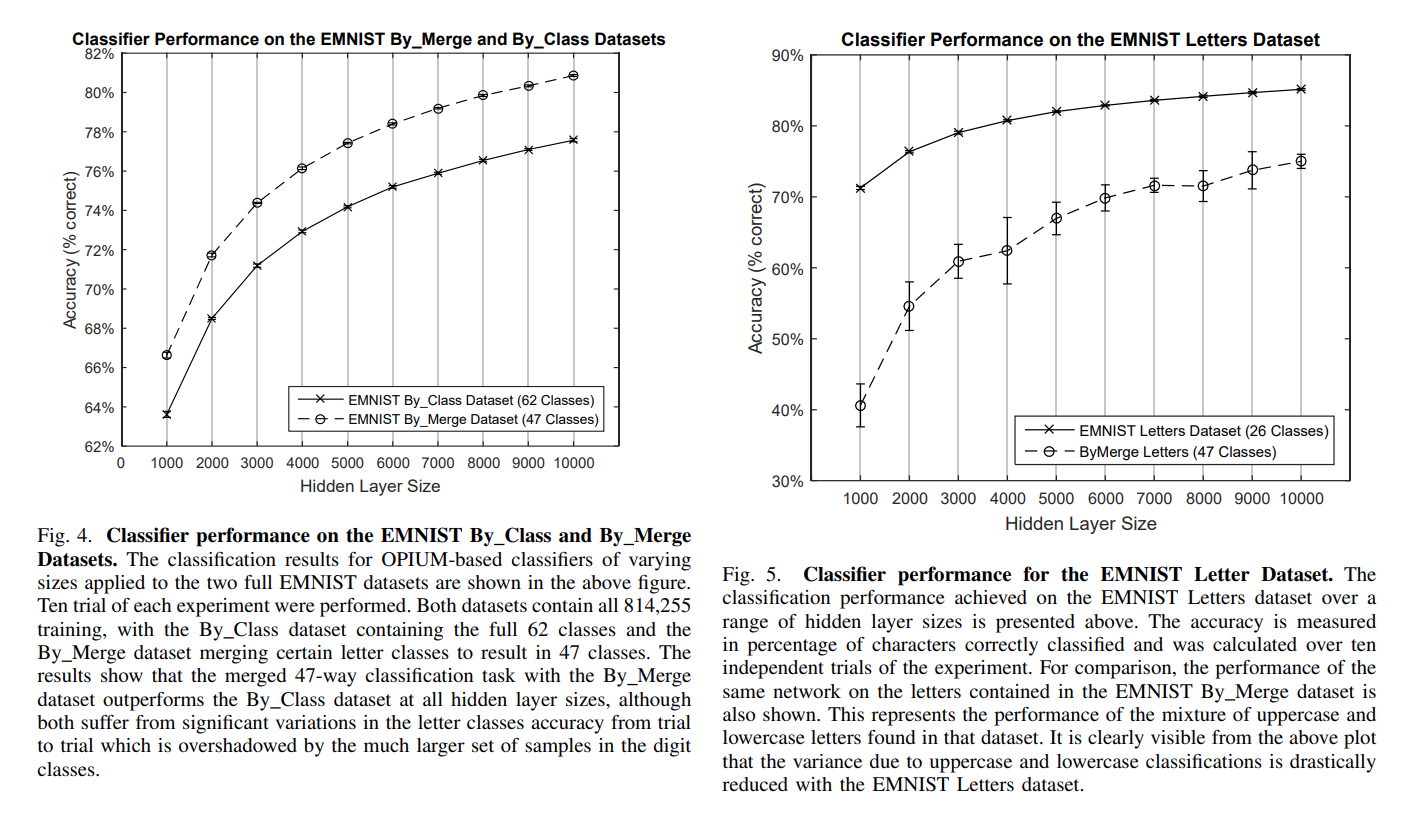

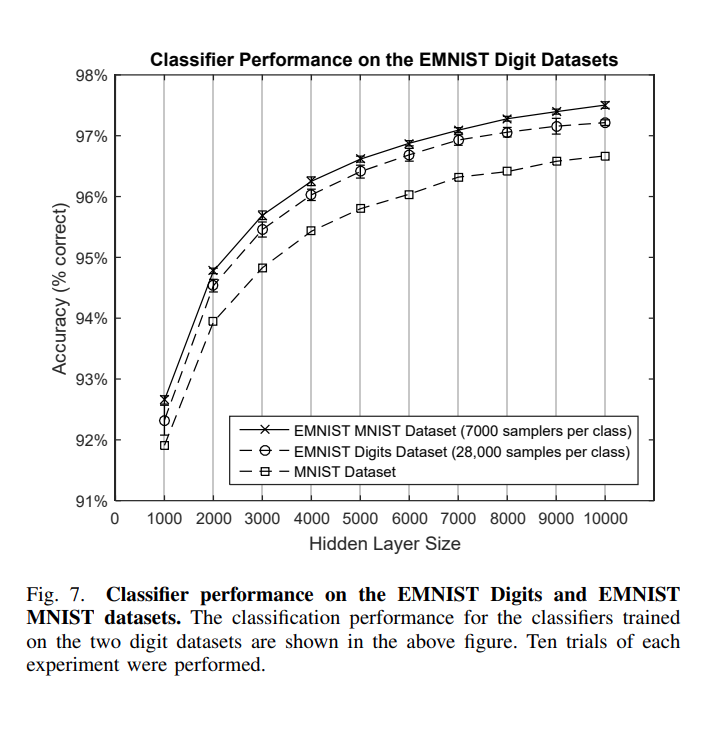

Overall, the EMNIST data set is relatively free of values that may skew our data, and it does an adequate job of accounting for the many different ways a letter can be written. The investigation we did on this set was very useful in developing our neural network, as well as gaining an understanding of what exactly this set contains and is useful for.